# INDEX

- **Series**
  - Creation
  - Accesing elements
  - Applying conditions
  - Attributes and functions
- **Dataframe**
  1. Getting DF
     - using pd Series
     - using dictionary
  2. Importing data from files
     - csv, Excel
- **Basic Exploration**
- **Structure Based Manipulations**
    - fetching columns
    - change datatypes
    - rename columns
    - add columns
    - delete columns
    - re-arrange columns
- **Dates and Time**
- **Taking Backups**

In [1]:
import pandas as pd
import os
os.chdir(r'D:\analytixlabs\DataSets')
os.getcwd()

'D:\\analytixlabs\\DataSets'

In [2]:
stores = pd.read_csv("stores.csv") 
stores.shape

(32, 15)

# PANDAS

- panel data analysis/panel dataframe and series
- meant for providing tables
		- pandas Series
			- 1 dim, homogenous, vect DS
		- pandas DataFrame
			- collection of Series
- pandas dataframe is table
- pandas series is column of table

## Series
### (S is capital)
- one dimentional
- homogenous
- vectorized
- Accessed by two indicators
    - Series contains index (0 to n-1)    - **iloc**
        - always 0 to n-1, even if user sets a custom index
        - exists internally, never gets displayed
	- Series also contains keys (user defined)   -  **loc**
        - by default it is same as iloc, unless the user sets an index
        - gets displayed whenever Series is printed

### Creation
- `pd.Series()`
- can give input as list, set, tuple, dict, ndarray

In [3]:
import pandas as pd

In [3]:
l1 = [12,43,23,67,54,56,30,13,56,54,78,15,88,99]
l1

[12, 43, 23, 67, 54, 56, 30, 13, 56, 54, 78, 15, 88, 99]

In [4]:
ser1 = pd.Series(l1)

In [5]:
ser1

0     12
1     43
2     23
3     67
4     54
5     56
6     30
7     13
8     56
9     54
10    78
11    15
12    88
13    99
dtype: int64

In [7]:
type(ser1)

pandas.core.series.Series

In [10]:
list('abcdefghijklmn')

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']

In [14]:
ser2 = pd.Series(l1, index=(list('abcdefghijklmn')))
ser2

# loc gets displayed --->  a,b,c,d ...l,m,n
# iloc is internal   --->  0,1,2,3 ... n-1

a    12
b    43
c    23
d    67
e    54
f    56
g    30
h    13
i    56
j    54
k    78
l    15
m    88
n    99
dtype: int64

In [18]:
ser3 = pd.Series(l1, index=range(1,15))
ser3

# loc ---> 1 - 14
# iloc ---> 0 - 13

1     12
2     43
3     23
4     67
5     54
6     56
7     30
8     13
9     56
10    54
11    78
12    15
13    88
14    99
dtype: int64

### Access Elements

- the regualar `[]` can be used but we'll use an improved version
- two indexes
    - `Series.loc[]`
    - `Series.iloc[]`

In [ ]:
ser1
# loc == iloc

In [19]:
ser1.iloc[4]

54

In [20]:
ser1.loc[4]

54

In [ ]:
ser2
# loc and iloc are not same

# loc gets displayed --->  a,b,c,d ...l,m,n
# iloc is internal   --->  0,1,2,3 ... n-1

In [21]:
ser2.loc['e']

54

In [22]:
ser2.iloc[4]

54

In [23]:
ser3

1     12
2     43
3     23
4     67
5     54
6     56
7     30
8     13
9     56
10    54
11    78
12    15
13    88
14    99
dtype: int64

In [29]:
ser3.loc[6]

56

In [31]:
ser3.iloc[5]

56

In [32]:
# Sequential indexing for iloc
ser1.iloc[0:5]
ser1.iloc[3:]
ser1.iloc[:8]


# non sequential access using .iloc[[]]
ser1.iloc[[2,3,6,7,8]]

# both the above are applicable to any series ser1,ser2,ser3 (for iloc)

2    23
3    67
6    30
7    13
8    56
dtype: int64

In [114]:
# Sequential indexing for loc[]
#    - this is possible if loc contains sequential numbers as input
#             - eg : ser1 (0-13), ser3(1-14)
#    - for list, tuple, set, dict, array, pd.Series.iloc  --->  [st : end] --> end is excluded
#    - but for loc[st : end] - ---> upper-bound is INCLUDED
ser1.loc[0:6]

0    12
1    43
2    23
3    67
4    54
5    56
6    30
dtype: int64

In [115]:
ser3.loc[4:9]

4    67
5    54
6    56
7    30
8    13
9    56
dtype: int64

In [116]:
ser2.loc[3:9] # this is incorrect!!!

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [3] of <class 'int'>

In [118]:
ser2.loc["a":"f"]
# look for the loc "a" 
# look for the loc "f"
# if "a" is present before "f", then all elements bn a to f will be extracted

a    12
b    43
c    23
d    67
e    54
f    56
dtype: int64

In [33]:
ser2

a    12
b    43
c    23
d    67
e    54
f    56
g    30
h    13
i    56
j    54
k    78
l    15
m    88
n    99
dtype: int64

In [40]:
ser2.loc["a":"z"]

a    12
b    43
c    23
d    67
e    54
f    56
g    30
h    13
i    56
j    54
k    78
l    15
m    88
n    99
dtype: int64

In [119]:
ser1.loc[[4,5,8,10]]

4     54
5     56
8     56
10    78
dtype: int64

### Applying Conditions

- Series also follows boolean indexing
- boolean indexes **always should be passed to loc[ ]**

In [121]:
# Task get all elements form ser1 that are < 30
ser1 < 30 # booelan index
ser1.loc[(ser1 < 30)]

0     12
2     23
7     13
11    15
dtype: int64

In [122]:
ser1.iloc[(ser1 < 30)] # NOPE!

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [41]:
# task : get all elements from ser1 that are > 40 and < 80
result1 = ser1.loc[(ser1 > 40) & (ser1 < 80)]
result1

# iloc --> 0 to 6
# loc  --> [1,3,4,5,8,9,10]


1     43
3     67
4     54
5     56
8     56
9     54
10    78
dtype: int64

In [42]:
result1.loc[5]

56

In [43]:
result1.iloc[3]

56

### 4. Attributes and functions

In [131]:
print(dir(l1))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [133]:
print(dir(arr1))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

In [134]:
print(dir(ser1))

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__rdiv

In [44]:
ser1.dtype

dtype('int64')

In [45]:
ser1.mean()

49.142857142857146

In [46]:
ser1.median()

54.0

In [47]:
ser1.quantile([0,0.25,0.5,0.75,1])

0.00    12.00
0.25    24.75
0.50    54.00
0.75    64.25
1.00    99.00
dtype: float64

## DataFrame 
#### (D and F are capital)

- two dimentional, heterogenous DS
- vectorized
- rows and columns
	- rows -- loc and iloc
	- cols -- loc and iloc
- A collection/concatenation of equally sized Series
    
### 1. Getting dataframes -- phase 1 (Manually Creating DF)

#### 1.1 Using pandas Series
- multiple pd.Series, all of equal size
- concatenate all of them



In [48]:
a = pd.Series([1,2,3,4,5,6],name = "Emp_ID")
b = pd.Series([4363,7373,3473,7343,3473,3754],name = "Emp_Sal")
c = pd.Series(["Thanos","John","Tywin","Stark","Pojo","Mario"],name = "Emp_Name")

In [51]:
c

0    Thanos
1      John
2     Tywin
3     Stark
4      Pojo
5     Mario
Name: Emp_Name, dtype: object

In [52]:
pd.concat([a,c,b],axis=0) # by default the axis = 0 (rows)

0         1
1         2
2         3
3         4
4         5
5         6
0    Thanos
1      John
2     Tywin
3     Stark
4      Pojo
5     Mario
0      4363
1      7373
2      3473
3      7343
4      3473
5      3754
dtype: object

In [53]:
Emp_df = pd.concat([a,c,b],axis=1) #  axis set to 1 (column)
Emp_df
# Emp_df is a DataFrame
# rows and cols
# rows = loc - 0 to 5    and    iloc = 0 to 5
# cols = loc - ["Emp_ID","Emp_Name","Emp_Sal"]  and iloc = 0 to 2

,Emp_ID,Emp_Name,Emp_Sal
0,1,Thanos,4363
1,2,John,7373
2,3,Tywin,3473
3,4,Stark,7343
4,5,Pojo,3473
5,6,Mario,3754


#### 1.2 Using a dict

In [54]:
Emp_Dict = {
                "EmpID":[1,2,3,4,5],
                "EName":("Raushan","Shankar","Ruchi","Prachi","Pavan"),
                "Sal":(3252,2352,7346,2462,2462)
           }
Emp_Dict

{'EmpID': [1, 2, 3, 4, 5],
 'EName': ('Raushan', 'Shankar', 'Ruchi', 'Prachi', 'Pavan'),
 'Sal': (3252, 2352, 7346, 2462, 2462)}

In [160]:
pd.DataFrame(Emp_Dict)

,EmpID,EName,Sal
0,1,Raushan,3252
1,2,Shankar,2352
2,3,Ruchi,7346
3,4,Prachi,2462
4,5,Pavan,2462


### 2. Getting DataFrames Phase 2 -- Importing data from files
- we can import data from data files - csv/text, Excel, SAS or any file
- connect to a file system or set your directory path
- import the data using various `pd.read_xxxx` statements
- after importing any file, that file is converted to a pandas DataFrame inside python environment
- we have a copy of that file within python, any changes made are changes to the DataFrame
    - the original file is not changed
    - unless, we decide to overrite the original file using a code
    
#### 2.1 Importing a text delimited or a csv file
- csv file or text file with a delimiter
- csv --> sep = "," and for other files we should know what is the sep
- where is the file present?
    - mention the full file path
    - or set our working or current folder to that path (ftp URL)

In [109]:
import pandas as pd

In [5]:
# How to set a folder path
import os

os.getcwd() # gets current working dir

In [2]:
# set a path as my new cwd
os.chdir(r'D:\analytixlabs\DataSets')
#os.chdir('E:\\DSP_March_2020_BLR\\DataSets')  # \\
#os.chdir(r'E:\DSP_March_2020_BLR\DataSets') # use a raw string r'str'

In [3]:
os.getcwd()

'D:\\analytixlabs\\DataSets'

In [6]:
# reading a csv file
# stores.csv
# 1. pd.read_csv
# 2. file path, name and extn
#   - if file is not in cwd -> full path
#   - using / as file sep or \\ as file sep
# 3. use sep = "," "|" if data is not seperated

stores = pd.read_csv("D:\\analytixlabs\\DataSets\\stores.csv", sep =",")
stores

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4


In [9]:
type(stores)

pandas.core.frame.DataFrame

In [10]:
pd.read_csv("stores.csv")  # no need of full path as we are in current directory

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4


#### 2.2 Read an excel file?

In [9]:
# AutoInsurance.xlsx
# 1. pd.read_excel() --> xls, xlsx, xlsm files can be read and xlsb files CANNOT be read by python
# 2. file path, name and extn
# 3. sheet name or index

Insurance_sh1 = pd.read_excel("AutoInsurance.xlsx") # by default the first sheet is read
Insurance_sh1

,CASENUM,ATTORNEY,CLMSEX,MARITAL,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,1.0,NaN,2.0,1.0,50.0,34.940
1,13,2,2.0,2.0,1.0,1.0,28.0,10.892
2,66,2,1.0,2.0,2.0,1.0,5.0,0.330
3,71,1,1.0,1.0,2.0,2.0,32.0,11.037
4,96,2,1.0,4.0,2.0,1.0,30.0,0.138
...,...,...,...,...,...,...,...,...
1335,34210,2,1.0,2.0,2.0,1.0,NaN,0.576
1336,34220,1,2.0,1.0,2.0,1.0,46.0,3.705
1337,34223,2,2.0,1.0,2.0,1.0,39.0,0.099
1338,34245,1,2.0,2.0,1.0,1.0,18.0,3.277


In [10]:
# what if we have to read some other sheet?
# sheet_name = name of the sheet or the index of the sheet (0 to n-1) 
Insurance_sh2 = pd.read_excel("Autoinsurance.xlsx",sheet_name = "AutoClaims")   
# or
Insurance_sh2 = pd.read_excel("AutoInsurance.xlsx", sheet_name = 1) # 0,1,2,3 .. 
Insurance_sh2

,CLAIMCASES,STATE,CLASS,PAID
0,27296,STATE 14,C6,1134.44
1,8716,STATE 15,C6,3761.24
2,16795,STATE 15,C11,7842.31
3,16721,STATE 15,F6,2384.67
4,1092,STATE 15,F6,650.00
...,...,...,...,...
6768,3562,STATE 15,C71,39.31
6769,32142,STATE 02,C71,35.00
6770,24933,STATE 17,C7B,27.46
6771,7769,STATE 01,C71,25.00


In [25]:
# Automating Excel file import - multiple sheets
# --> get all the sheets into a dictionary

# Connection with the excel file

file = pd.ExcelFile(r"D:\analytixlabs\DataSets\AutoInsurance.xlsx")
file

In [26]:
# getting all the sheet names in a list
file.sheet_names

['AutoBi', 'AutoClaims']

In [28]:
# read the sheets from this file
# using .parse() 

file.parse(sheet_name = 0)
file.parse(sheet_name = 1)

,CLAIMCASES,STATE,CLASS,PAID
0,27296,STATE 14,C6,1134.44
1,8716,STATE 15,C6,3761.24
2,16795,STATE 15,C11,7842.31
3,16721,STATE 15,F6,2384.67
4,1092,STATE 15,F6,650.00
...,...,...,...,...
6768,3562,STATE 15,C71,39.31
6769,32142,STATE 02,C71,35.00
6770,24933,STATE 17,C7B,27.46
6771,7769,STATE 01,C71,25.00


In [33]:
data_dump = {}

for sheet in file.sheet_names:
    data_dump[sheet] = file.parse(sheet_name = sheet)

In [34]:
data_dump

{'AutoBi':       CASENUM  ATTORNEY  CLMSEX  MARITAL  CLMINSUR  SEATBELT  CLMAGE    LOSS
 0           5         1     1.0      NaN       2.0       1.0    50.0  34.940
 1          13         2     2.0      2.0       1.0       1.0    28.0  10.892
 2          66         2     1.0      2.0       2.0       1.0     5.0   0.330
 3          71         1     1.0      1.0       2.0       2.0    32.0  11.037
 4          96         2     1.0      4.0       2.0       1.0    30.0   0.138
 ...       ...       ...     ...      ...       ...       ...     ...     ...
 1335    34210         2     1.0      2.0       2.0       1.0     NaN   0.576
 1336    34220         1     2.0      1.0       2.0       1.0    46.0   3.705
 1337    34223         2     2.0      1.0       2.0       1.0    39.0   0.099
 1338    34245         1     2.0      2.0       1.0       1.0    18.0   3.277
 1339    34253         2     2.0      2.0       2.0       1.0    30.0   0.688
 
 [1340 rows x 8 columns],
 'AutoClaims':       CLAIM

In [36]:
# retrieving data from the dict
# dict[key]

data_dump["AutoBi"]

,CASENUM,ATTORNEY,CLMSEX,MARITAL,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,1.0,NaN,2.0,1.0,50.0,34.940
1,13,2,2.0,2.0,1.0,1.0,28.0,10.892
2,66,2,1.0,2.0,2.0,1.0,5.0,0.330
3,71,1,1.0,1.0,2.0,2.0,32.0,11.037
4,96,2,1.0,4.0,2.0,1.0,30.0,0.138
...,...,...,...,...,...,...,...,...
1335,34210,2,1.0,2.0,2.0,1.0,NaN,0.576
1336,34220,1,2.0,1.0,2.0,1.0,46.0,3.705
1337,34223,2,2.0,1.0,2.0,1.0,39.0,0.099
1338,34245,1,2.0,2.0,1.0,1.0,18.0,3.277


## Basic Explorations

In [11]:
# 1. what are the no of rows and cols of the df
# shape is a value, not a function
# value --> tuple

stores.shape # tuple (nrow, ncol)

(32, 15)

In [10]:
stores.shape[0]

32

In [9]:
stores.shape[1]

15

In [13]:
# 2. what are the names of the columns

stores.columns
print(list(stores.columns))

['StoreCode', 'StoreName', 'StoreType', 'Location', 'OperatingCost', 'Staff_Cnt', 'TotalSales', 'Total_Customers', 'AcqCostPercust', 'BasketSize', 'ProfitPercust', 'OwnStore', 'OnlinePresence', 'Tenure', 'StoreSegment']


In [14]:
# 3. what are the datatypes of the columns?
stores.dtypes
# Series --> loc - cols name and values = datatype
# object datatype ------------> str in pandas
# float64, int64

StoreCode           object
StoreName           object
StoreType           object
Location            object
OperatingCost      float64
Staff_Cnt            int64
TotalSales         float64
Total_Customers      int64
AcqCostPercust     float64
BasketSize         float64
ProfitPercust      float64
OwnStore             int64
OnlinePresence       int64
Tenure               int64
StoreSegment         int64
dtype: object

In [17]:
# task : get all columns that are strings
strs = stores.dtypes.loc[stores.dtypes == "object"]    # boolean indexing(loc)
# ser1.loc[ser1 == "object"]
strs

StoreCode    object
StoreName    object
StoreType    object
Location     object
dtype: object

In [18]:
# task : we don't need Series we instead need a list of columns
list(strs.index)

['StoreCode', 'StoreName', 'StoreType', 'Location']

In [20]:
# task : get all columns that are numbers
num_cols = stores.dtypes.loc[(stores.dtypes == "int64") | (stores.dtypes == "float64") | (stores.dtypes == "int32")]
# ser1.loc[ser1 == "object"]
print(list(num_cols.index))

['OperatingCost', 'Staff_Cnt', 'TotalSales', 'Total_Customers', 'AcqCostPercust', 'BasketSize', 'ProfitPercust', 'OwnStore', 'OnlinePresence', 'Tenure', 'StoreSegment']


In [196]:
# Explanation
ser2
# loc or index
list(ser2.index)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']

In [21]:
# 4. Counts - df.count()
# row count - total no of rows irrespective of the values present inside it - blank or non blank
stores.shape[0]


32

In [22]:
stores.count()
# count() counts no of non blank values per column

StoreCode          32
StoreName          32
StoreType          32
Location           32
OperatingCost      32
Staff_Cnt          32
TotalSales         32
Total_Customers    32
AcqCostPercust     29
BasketSize         32
ProfitPercust      32
OwnStore           32
OnlinePresence     32
Tenure             32
StoreSegment       32
dtype: int64

In [23]:
# 5. info()
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StoreCode        32 non-null     object 
 1   StoreName        32 non-null     object 
 2   StoreType        32 non-null     object 
 3   Location         32 non-null     object 
 4   OperatingCost    32 non-null     float64
 5   Staff_Cnt        32 non-null     int64  
 6   TotalSales       32 non-null     float64
 7   Total_Customers  32 non-null     int64  
 8   AcqCostPercust   29 non-null     float64
 9   BasketSize       32 non-null     float64
 10  ProfitPercust    32 non-null     float64
 11  OwnStore         32 non-null     int64  
 12  OnlinePresence   32 non-null     int64  
 13  Tenure           32 non-null     int64  
 14  StoreSegment     32 non-null     int64  
dtypes: float64(5), int64(6), object(4)
memory usage: 3.9+ KB


In [ ]:
##########################    Task   ###############################################################
# 1. Read excel and csv files to python
# 2. Explore the data and prepare a report
#---------------------------------------------------------------------------------------------------
# 3. how to extract or subset a DF by column names
#    stores --> fetch one col
#               fetch columns = ["StoreCode","Location","TotalSales","OperatingCost"]

In [208]:
stores.head() # first 5 rows
# stores.head(10) # first n rows

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2


In [24]:
stores.tail() # last 5 rows
# stores.tail(10) # last n rows

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
27,STR128,Super Market,Super Market,Kolkata,30.4,40,95.1,113,3.77,1.513,16.9,1,1,5,2
28,STR129,Central Store,Super Market,Kolkata,15.8,80,351.0,264,4.22,3.170,14.5,0,1,5,4
29,STR130,Apparel Zone,Apparel,Kolkata,19.7,60,145.0,175,3.62,2.770,15.5,0,1,5,4
30,STR131,Fashion Bazar,Apparel,Kolkata,15.0,80,301.0,335,3.54,3.570,14.6,0,1,5,4
31,STR132,Digital Bazar,Electronincs,Kolkata,21.4,40,121.0,109,4.11,2.780,18.6,1,1,4,2


# Structure Based Manipulations

- fetching columns
- change datatypes
- rename columns
- add columns
- delete columns
- re-arrange columns
---

## 1. Fetching Columns

### 1.1 By using the `.` operator

- Columns are attributes of a DataFrame
- E.g. `stores.Location`

    1.output is Series
    
    2.the column is extracted and printed but NEVER gets deleted from the DataFrame
    


In [25]:
stores.columns

Index(['StoreCode', 'StoreName', 'StoreType', 'Location', 'OperatingCost',
       'Staff_Cnt', 'TotalSales', 'Total_Customers', 'AcqCostPercust',
       'BasketSize', 'ProfitPercust', 'OwnStore', 'OnlinePresence', 'Tenure',
       'StoreSegment'],
      dtype='object')

In [27]:
stores.index # row indexes 
# as of no 0 to 31

RangeIndex(start=0, stop=32, step=1)

In [214]:
stores.Location
# 1, output is Series
# 2, the column is extracted and printed but NEVER gets deleted from the DataFrame

0       Delhi
1       Delhi
2       Delhi
3       Delhi
4       Delhi
5       Delhi
6       Delhi
7       Delhi
8     Chennai
9     Chennai
10    Chennai
11    Chennai
12    Chennai
13    Chennai
14    Chennai
15    Chennai
16     Mumbai
17     Mumbai
18     Mumbai
19     Mumbai
20     Mumbai
21     Mumbai
22     Mumbai
23     Mumbai
24    Kolkata
25    Kolkata
26    Kolkata
27    Kolkata
28    Kolkata
29    Kolkata
30    Kolkata
31    Kolkata
Name: Location, dtype: object

In [29]:
stores.Location.head(7)

0    Delhi
1    Delhi
2    Delhi
3    Delhi
4    Delhi
5    Delhi
6    Delhi
Name: Location, dtype: object

In [215]:
# Limitation
# 1. we can only access one column at a time
# 2. if the column name is not according to the Python naming rules, then . won't work

# stores.Total_Customers (correct)
# stores.Total Customers (incorrect)

### 1.2 By using the `[]` and `[[]]` operators
- we must be able to access irrespective of the names.
- we must be able to access multiple columns
    - that multiple columns needs to be given as a list of col. names - `[[]]`
- Limitation : we cannot extract rows using `[]` and `[[]]`

In [33]:
stores["Location"]

# stores.Total Customers # wont work
# stores["Total Customers"] # this works

0       Delhi
1       Delhi
2       Delhi
3       Delhi
4       Delhi
5       Delhi
6       Delhi
7       Delhi
8     Chennai
9     Chennai
10    Chennai
11    Chennai
12    Chennai
13    Chennai
14    Chennai
15    Chennai
16     Mumbai
17     Mumbai
18     Mumbai
19     Mumbai
20     Mumbai
21     Mumbai
22     Mumbai
23     Mumbai
24    Kolkata
25    Kolkata
26    Kolkata
27    Kolkata
28    Kolkata
29    Kolkata
30    Kolkata
31    Kolkata
Name: Location, dtype: object

In [35]:
stores[["Location"]].head()
# DataFrame with one column

,Location
0,Delhi
1,Delhi
2,Delhi
3,Delhi
4,Delhi


In [37]:
sub1 = stores[["StoreCode","Location","TotalSales","OperatingCost"]].tail()
sub1

,StoreCode,Location,TotalSales,OperatingCost
27,STR128,Kolkata,95.1,30.4
28,STR129,Kolkata,351.0,15.8
29,STR130,Kolkata,145.0,19.7
30,STR131,Kolkata,301.0,15.0
31,STR132,Kolkata,121.0,21.4


In [220]:
#(Explaination)
# Sales     
# Stores.Sales

# Sales (2016)
# Stores.Sales (2016)
# Stores["Sales (2016)"]

### 1.3 By using `df.loc[ , ]` and `df.iloc[ , ]`

- **`[rows,columns]`**  -->  rows,columns

Syntax
- `df.loc[row_names,column_names]`
- `df.iloc[row_index,column_index]`

In [221]:
# Task : get columns "StoreCode","Location","TotalSales" and "OperatingCost"
# stores.loc[[],[]]
stores.loc[,["StoreCode","Location","TotalSales","OperatingCost"]]
# syntax error because we have not mentioned anythoing about the rows.

SyntaxError: invalid syntax (<ipython-input-221-f47df4f02d13>, line 3)

In [39]:
stores.loc[:,["StoreCode","Location","TotalSales","OperatingCost"]]
# : denotes all rows.. 0 : n-1

,StoreCode,Location,TotalSales,OperatingCost
0,STR101,Delhi,160.0,21.0
1,STR102,Delhi,160.0,21.0
2,STR103,Delhi,108.0,22.8
3,STR104,Delhi,258.0,21.4
4,STR105,Delhi,360.0,18.7
5,STR106,Delhi,225.0,18.1
6,STR107,Delhi,360.0,14.3
7,STR108,Delhi,146.7,24.4
8,STR109,Chennai,140.8,22.8
9,STR110,Chennai,167.6,19.2


In [40]:
# Task : get columns "StoreCode","Location","TotalSales" and "OperatingCost"
# but from row no 5 till 9
stores.loc[5:9,["StoreCode","Location","TotalSales","OperatingCost"]]
# 9(upperbound) is included because of loc

,StoreCode,Location,TotalSales,OperatingCost
5,STR106,Delhi,225.0,18.1
6,STR107,Delhi,360.0,14.3
7,STR108,Delhi,146.7,24.4
8,STR109,Chennai,140.8,22.8
9,STR110,Chennai,167.6,19.2


In [41]:
# .iloc[row ix, col ix]

stores.iloc[:,[1,3,6,7]]

,StoreName,Location,TotalSales,Total_Customers
0,Electronics Zone,Delhi,160.0,110
1,Apparel Zone,Delhi,160.0,110
2,Super Bazar,Delhi,108.0,93
3,Super Market,Delhi,258.0,110
4,Central Store,Delhi,360.0,175
5,Apparel Zone,Delhi,225.0,105
6,Fashion Bazar,Delhi,360.0,245
7,Digital Bazar,Delhi,146.7,62
8,Electronics Zone,Chennai,140.8,95
9,Apparel Zone,Chennai,167.6,123


In [11]:
stores.iloc[0:10,[1,3,6,7]]

,StoreName,Location,TotalSales,Total_Customers
0,Electronics Zone,Delhi,160.0,110
1,Apparel Zone,Delhi,160.0,110
2,Super Bazar,Delhi,108.0,93
3,Super Market,Delhi,258.0,110
4,Central Store,Delhi,360.0,175
5,Apparel Zone,Delhi,225.0,105
6,Fashion Bazar,Delhi,360.0,245
7,Digital Bazar,Delhi,146.7,62
8,Electronics Zone,Chennai,140.8,95
9,Apparel Zone,Chennai,167.6,123


In [43]:
stores.iloc[:,0:5]

,StoreCode,StoreName,StoreType,Location,OperatingCost
0,STR101,Electronics Zone,Electronincs,Delhi,21.0
1,STR102,Apparel Zone,Apparel,Delhi,21.0
2,STR103,Super Bazar,Super Market,Delhi,22.8
3,STR104,Super Market,Super Market,Delhi,21.4
4,STR105,Central Store,Super Market,Delhi,18.7
5,STR106,Apparel Zone,Apparel,Delhi,18.1
6,STR107,Fashion Bazar,Apparel,Delhi,14.3
7,STR108,Digital Bazar,Electronincs,Delhi,24.4
8,STR109,Electronics Zone,Electronincs,Chennai,22.8
9,STR110,Apparel Zone,Apparel,Chennai,19.2


In [44]:
stores.iloc[[0,5,8,10],0:5]

,StoreCode,StoreName,StoreType,Location,OperatingCost
0,STR101,Electronics Zone,Electronincs,Delhi,21.0
5,STR106,Apparel Zone,Apparel,Delhi,18.1
8,STR109,Electronics Zone,Electronincs,Chennai,22.8
10,STR111,Super Bazar,Super Market,Chennai,17.8


## 2. rename columns

- `stores.rename(columns = {})`
- what does this `{}` contain?
    - `{"ExisitngName1":"NewName1","ExisitngName2":"NewName2", ... }

In [51]:
stores.columns

Index(['StoreCode', 'StoreName', 'StoreType', 'Location', 'OperatingCost',
       'Staff_Cnt', 'TotalSales', 'Total_Customers', 'AcqCostPercust',
       'BasketSize', 'ProfitPercust', 'OwnStore', 'OnlinePresence', 'Tenure',
       'StoreSegment'],
      dtype='object')

In [12]:
# Task : rename : Location to City and Tenure --> Duration
stores.rename(columns = {"Location" : "City","Tenure":"Duration"})
# renaming and printing but not permanently saving

# stores = stores.rename(columns={'Location':'City','Tenure':'Duration'})   (now saving it permanently)
# stores1 = stores.rename(columns={'Location':'City','Tenure':'Duration'})  (once saved permanently cant undo so stores1)

,StoreCode,StoreName,StoreType,City,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Duration,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4


In [13]:
stores.columns
# renaming and printing but not permanently saving

Index(['StoreCode', 'StoreName', 'StoreType', 'Location', 'OperatingCost',
       'Staff_Cnt', 'TotalSales', 'Total_Customers', 'AcqCostPercust',
       'BasketSize', 'ProfitPercust', 'OwnStore', 'OnlinePresence', 'Tenure',
       'StoreSegment'],
      dtype='object')

## 3. Adding a column
- either add a blank column or derive a column based out of existing columns
- The concept of **broadcasting** in Series (and also in ndarray)
     - if we consider two Series or ndarray of same size, then we can perform arithmatic operations to the corresponding elements

In [120]:
# Case 1 : lists
num1 = [10,30,60,5,90]
num2 = [80,20,10,30,40]

num1 + num2

[10, 30, 60, 5, 90, 80, 20, 10, 30, 40]

In [121]:
# Task : add all the corresponding elements in num1 and num2
# lists : loop
for i in range(0,5):
    print(num1[i] + num2[i])

90
50
70
35
130


In [122]:
import numpy as np

In [123]:
a_num1 = np.array([10,30,60,5,90])
a_num2 = np.array([80,20,10,30,40])
a_num1 + a_num2

array([ 90,  50,  70,  35, 130])

In [124]:
a_num1 * a_num2

array([ 800,  600,  600,  150, 3600])

In [125]:
a_num1/10

array([1. , 3. , 6. , 0.5, 9. ])

In [126]:
s_num1 = pd.Series([10,30,60,5,90])
s_num2 = pd.Series([80,20,10,30,40])
s_num1 + s_num2

0     90
1     50
2     70
3     35
4    130
dtype: int64

In [127]:
s_num1/10

0    1.0
1    3.0
2    6.0
3    0.5
4    9.0
dtype: float64

In [14]:
# Method 1 : using df[]
stores["Dummy1"] = 0

In [15]:
# Task add a column called NetProfit using 'TotalSales' and 'OperatingCost'
# stores.TotalSales - stores.OperatingCost

# Method 1 : using df[]
# NetProfit
stores["NetProfit"] = stores.TotalSales - stores.OperatingCost

In [16]:
stores.head(10)

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,Dummy1,NetProfit
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,0,139.0
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,0,139.0
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,0,85.2
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,0,236.6
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,0,341.3
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,0,206.9
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,0,345.7
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,0,122.3
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,0,118.0
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,0,148.4


In [17]:
# Method 2
# df = df.assign()
# assign works in the same way as above but the advantage is we can add multiple cols at a go!

stores = stores.assign( NetProfit2 = stores.TotalSales - stores.OperatingCost, 
                        Dummy2 = "abc",
                        Dummy3 = 123
                      )


In [18]:
stores.head(10)

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,Dummy1,NetProfit,NetProfit2,Dummy2,Dummy3
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,0,139.0,139.0,abc,123
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,0,139.0,139.0,abc,123
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,0,85.2,85.2,abc,123
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,0,236.6,236.6,abc,123
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,0,341.3,341.3,abc,123
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,0,206.9,206.9,abc,123
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,0,345.7,345.7,abc,123
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,0,122.3,122.3,abc,123
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,0,118.0,118.0,abc,123
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,0,148.4,148.4,abc,123


## 4. Deleting Columns

In [19]:
# method 1
# del df['col']
del stores["Dummy1"]

In [20]:
stores.head()

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,NetProfit,NetProfit2,Dummy2,Dummy3
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,139.0,139.0,abc,123
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,139.0,139.0,abc,123
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,85.2,85.2,abc,123
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,236.6,236.6,abc,123
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,341.3,341.3,abc,123


In [274]:
# Method 2
# df = df.drop(columns = [])

In [21]:
stores = stores.drop(columns=["NetProfit2","Dummy2","Dummy3"])

In [22]:
stores.head()

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,NetProfit
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,139.0
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,139.0
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,85.2
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,236.6
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,341.3


## 5. Re-arranging columns

In [23]:
stores.shape

(32, 16)

In [24]:
stores.iloc[:,[15,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]


,NetProfit,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,139.0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,139.0,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,85.2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,236.6,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,341.3,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2
5,206.9,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1
6,345.7,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4
7,122.3,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2
8,118.0,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
9,148.4,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4


In [30]:
list(range(0,4)) + [5,6,4,15] + list(range(7,15))

[0, 1, 2, 3, 5, 6, 4, 15, 7, 8, 9, 10, 11, 12, 13, 14]

In [31]:
stores.iloc[:,list(range(0,3)) + [5,6,4,15] + list(range(7,16))] #incorrect

,StoreCode,StoreName,StoreType,OperatingCost,Staff_Cnt,TotalSales,Tenure,StoreSegment,NetProfit,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure
0,STR101,Electronics Zone,Electronincs,21.0,60,160.0,4,4,139.0,110,3.90,2.620,16.46,0,1,4
1,STR102,Apparel Zone,Apparel,21.0,60,160.0,4,4,139.0,110,3.90,2.875,17.02,0,1,4
2,STR103,Super Bazar,Super Market,22.8,40,108.0,4,1,85.2,93,3.85,2.320,18.61,1,1,4
3,STR104,Super Market,Super Market,21.4,60,258.0,3,1,236.6,110,3.08,3.215,19.44,1,0,3
4,STR105,Central Store,Super Market,18.7,80,360.0,3,2,341.3,175,3.15,3.440,17.02,0,0,3
5,STR106,Apparel Zone,Apparel,18.1,60,225.0,3,1,206.9,105,2.76,3.460,20.22,1,0,3
6,STR107,Fashion Bazar,Apparel,14.3,80,360.0,3,4,345.7,245,3.21,3.570,15.84,0,0,3
7,STR108,Digital Bazar,Electronincs,24.4,40,146.7,4,2,122.3,62,3.69,3.190,20.00,1,0,4
8,STR109,Electronics Zone,Electronincs,22.8,40,140.8,4,2,118.0,95,3.92,3.150,22.90,1,0,4
9,STR110,Apparel Zone,Apparel,19.2,60,167.6,4,4,148.4,123,3.92,3.440,18.30,1,0,4


## 6. Changing Datatypes of columns

In [291]:
#  Datatypes                              Pandas
# -----------                            --------
#    str                                 "object"          (need to be put in "" for python to understand)
#    float                               "float64"
#    int                                 "int64", "int32", "int16", "int8"
#    bool                                 bool
# -----------
#    datetime                            "datetime64"

In [32]:
# Phase 1 : df.column.astype() or Series.astype()

# 1. changing any column to str

stores.TotalSales.astype(str)

0     160.0
1     160.0
2     108.0
3     258.0
4     360.0
5     225.0
6     360.0
7     146.7
8     140.8
9     167.6
10    167.6
11    275.8
12    275.8
13    275.8
14    472.0
15    460.0
16    440.0
17     78.7
18     75.7
19     71.1
20    120.1
21    318.0
22    304.0
23    350.0
24    400.0
25     79.0
26    120.3
27     95.1
28    351.0
29    145.0
30    301.0
31    121.0
Name: TotalSales, dtype: object

In [294]:
stores.TotalSales.astype("object") #(need to be put in "" for python to understand)

0       160
1       160
2       108
3       258
4       360
5       225
6       360
7     146.7
8     140.8
9     167.6
10    167.6
11    275.8
12    275.8
13    275.8
14      472
15      460
16      440
17     78.7
18     75.7
19     71.1
20    120.1
21      318
22      304
23      350
24      400
25       79
26    120.3
27     95.1
28      351
29      145
30      301
31      121
Name: TotalSales, dtype: object

In [36]:
stores.OnlinePresence.astype(bool)

0      True
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25     True
26     True
27     True
28     True
29     True
30     True
31     True
Name: OnlinePresence, dtype: bool

In [31]:
# 2. Change a column to boolean
stores.OnlinePresence = stores.OnlinePresence.astype(bool)

stores["OnlinePresence"] = stores.OnlinePresence.astype(bool) # faster

In [32]:
stores.dtypes

StoreCode           object
StoreName           object
StoreType           object
Location            object
Staff_Cnt            int64
TotalSales         float64
OperatingCost      float64
Dummy                int64
Total_Customers      int64
AcqCostPercust     float64
BasketSize         float64
ProfitPercust      float64
OwnStore             int64
OnlinePresence        bool
Tenure               int64
StoreSegment         int64
dtype: object

In [309]:
# 3. to numbers --> int and float
# we can use .astype(int) and .astype(float) but we'll avoid using it!!
# pd.to_numeric()


col = pd.Series([23,"pqr",56,"aqw",44.4,2,26,56,43,45.44,21.0,"abc"])
col

# what's wrong with .astype()
col.astype(float)

ValueError: could not convert string to float: 'pqr'

In [310]:
pd.to_numeric(col)
# pd.to_numeric uses an argument called errors = "coerce" which means force
# if we use that argument

ValueError: Unable to parse string "pqr" at position 1

In [311]:
pd.to_numeric(col,errors="coerce")
# is converting every value to float or int
# and un-convertables are being changed to NaN/missing value
# later we can deal with NaNs


0     23.00
1       NaN
2     56.00
3       NaN
4     44.40
5      2.00
6     26.00
7     56.00
8     43.00
9     45.44
10    21.00
11      NaN
dtype: float64

In [51]:
col2 = pd.Series([23,"pqr",56,"aqw",44,4,2,26,56,43,"abc"])
col2

0      23
1     pqr
2      56
3     aqw
4      44
5       4
6       2
7      26
8      56
9      43
10    abc
dtype: object

In [52]:
pd.to_numeric(col2, errors="coerce")

0     23.0
1      NaN
2     56.0
3      NaN
4     44.0
5      4.0
6      2.0
7     26.0
8     56.0
9     43.0
10     NaN
dtype: float64

In [54]:
l1 = [12,43,23,27,56,78,22,26,92,86]

In [56]:
cost = []
for i in l1:
    cost.append("$"+str(i))
    
cost = pd.Series(cost)
cost # remove $ and get numbers and then convert

0    $12
1    $43
2    $23
3    $27
4    $56
5    $78
6    $22
7    $26
8    $92
9    $86
dtype: object

In [316]:
c1 = "$45.66"

In [317]:
c1.replace("$","")

'45.66'

In [319]:
print(dir(c1))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [60]:
# for every object series, we have an attrinute called .str that gets activeted
# .str contains all the base string attributs and functions
cost = cost.str.replace("$","")
pd.to_numeric(cost)

0    12
1    43
2    23
3    27
4    56
5    78
6    22
7    26
8    92
9    86
dtype: int64

In [326]:
cost.astype("int64")
cost.astype("float64")

0     12.0
1     43.0
2     23.0
3     67.0
4     54.0
5     56.0
6     30.0
7     13.0
8     56.0
9     54.0
10    78.0
11    15.0
12    88.0
13    99.0
dtype: float64

## Dates and Time

- any repetiton of dates are default considered strings, cannot be processed
- none of the datetime properties are applicable to strings
- to these strings, a numerical property was added, this gave a sense of date and time
    - this number that got added
		- no of days from a base date (01-Jan-1970)
		- no of seconds from a base time
	"05-Apr-2020"   +    18000 (for present day/time)

- basedate = 01 Jan 1970(you cannot change basedate)
- basedate + 18357 = 05-Apr-2020        
- if you want to go past beyond base date you have to substract from base date


	- python base date - 01Jan1970 - 1970-01-01
	- python base time - 01Jan1970 12:00:00 am	

		(proper format) 1970-01-01 00:00:00
	- a proper date always have a format YYYY-MM-DD
		time : YYYY-MM-DD HH:MM:SS

- Application is not for user, this is how programming languages take date/time into consideration
	
 
			01Feb2020   -   05Apr2020
			number		     number
				      number  --> no of days between d1 and d2
                      
		1 year = 365.25 days
		1 month = 30.43 days
				 
		64 days-> 2 months 4 days

- datetime module in base python
	- converts a string date(which has proper date/time components) --> proper date
	- that is done by identifing the date/time components
	- each component is given a symbol
			     (externally seen string)	         (internally stored number)
				s = "05Apr2020"  ---> daysMon-abbrYear ---> 18357
                                        (pattern)
- strptime
	- string parsing of time and date 
	- provides date-time components and symbols
    

- String plus pattern using below symbols, if you can give this as an input to datetime. It will give you a date as an output
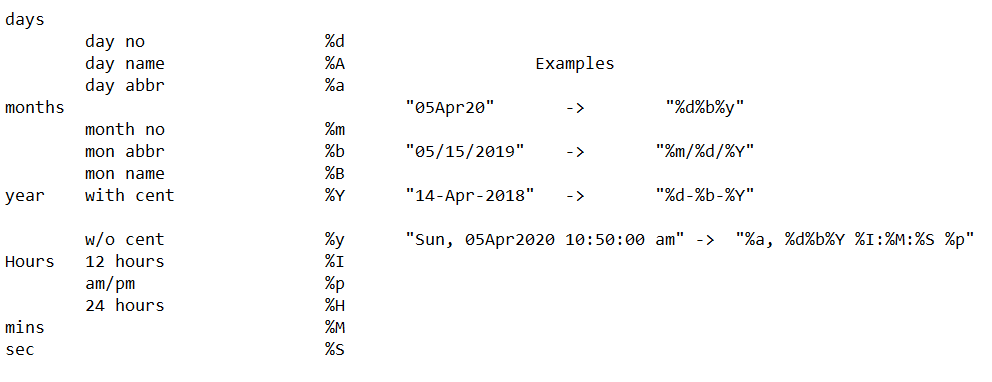


- string +pattern with symbols--->output

  "05Apr20"      +         "%d%b%y" 			--->  "2020-04-05" 
								                      (18357)internal

"5/4/20"  -> 5 apr or 4 may?? we identify by checking other dates in column and then assign symbols

- pandas internally makes use of datetime
	- we will use a pandas function to convert a Series to datetime
    
	**pd.to_datetime(Series, format = "")**

In [347]:
# Days difference  
# Task : from DoB, calculate age in years : 
# Logic : today's date - DoB = age

# 1. how to get system date and time

dt_today = pd.datetime.datetime.today()
today = dt_today.date()
type(today) # THIS IS NOT PANDAS datetime64[ns]
today = pd.to_datetime(today) # this is already understood by python interpreter, no need for format
today # made sure that this is pandas

# 2. Subtraction
# we also made sure that DoB is also in pandas
DoB_dt = pd.to_datetime(DoB, format="%d%b%Y")

Age = today - DoB_dt
Age # time differences are expressed in form of timedelta64
# this is not a number!

Age = Age.dt.days
# .dt attibute is present in every Series but gets activated for all datetime objects

Age = round(Age/365.25,0)
pd.concat([DoB,Age],axis=1)

,DoB,DoB
0,01Apr1998,22.0
1,10Jan1970,50.0
2,15Dec1989,30.0
3,01Jan2000,20.0


In [33]:
DoB = pd.Series(["01Apr1998","10Jan1970","15Dec1989","01Jan2000"], name = "DoB")

In [34]:
DoB

0    01Apr1998
1    10Jan1970
2    15Dec1989
3    01Jan2000
Name: DoB, dtype: object

In [40]:
pd.to_datetime(DoB, format="%d%b%Y")    #converts dtype:object into dtype:datetime64

# ns - nanoseconds 
# time is represented in form of nanoseconds
# 05-Apr-2020 11:00:00 am  -->  n ns from 01-Jan-1970 00:00:00

0   1998-04-01
1   1970-01-10
2   1989-12-15
3   2000-01-01
Name: DoB, dtype: datetime64[ns]

In [41]:
DoB_dt = pd.to_datetime(DoB , format="%d%b%Y")

In [42]:
today = pd.datetime.today().date()      #get system date and time
today

C:\Users\nshiv\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


datetime.date(2020, 4, 20)

In [43]:
type(today) # THIS IS NOT PANDAS datetime64[ns]

datetime.date

In [44]:
today = pd.to_datetime(today)
today

Timestamp('2020-04-20 00:00:00')

In [45]:
type(today) # made sure that this is pandas

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
Days = today - DoB_dt
Days  # time differences are expressed in form of timedelta64, this is not a number

0    8055 days
1   18363 days
2   11084 days
3    7415 days
Name: DoB, dtype: timedelta64[ns]

In [47]:
Days = Days.dt.days
Days
# .dt attibute is present in every Series but gets activated for all datetime objects

0     8055
1    18363
2    11084
3     7415
Name: DoB, dtype: int64

In [48]:
Years = round(Days/365.25 , 2)
Years

0    22.05
1    50.28
2    30.35
3    20.30
Name: DoB, dtype: float64

In [53]:
# Task : from DoB, calculate age in years : 
Age = pd.concat([DoB,Years],axis=1)
Age.columns=["DoB","Years"]
Age

,DoB,Years
0,01Apr1998,22.05
1,10Jan1970,50.28
2,15Dec1989,30.35
3,01Jan2000,20.30


In [ ]:
# Task : 
# In the above example - get Age in Years, Months and Days

In [54]:
Months = round(Days/30.43 , 2)
Months

0    264.71
1    603.45
2    364.25
3    243.67
Name: DoB, dtype: float64

In [59]:
Bdae = pd.concat([DoB,Years,Months,Days],axis=1)
Bdae.columns = ["DoB","Years","Months","Days"]
Bdae

,DoB,Years,Months,Days
0,01Apr1998,22.05,264.71,8055
1,10Jan1970,50.28,603.45,18363
2,15Dec1989,30.35,364.25,11084
3,01Jan2000,20.30,243.67,7415


In [369]:
# Handling the year problem for stings which has years w/o century
# step0 . convert the DoB3 into datetime64 despite the incorrect years
DoB3_dt = pd.to_datetime(DoB3, format = "%d%b%y")

# step1 . extract year out of your date 
#   the dt attribute of a Series
#         dt contains functions to extract components - year, month, days, h, m, s etc
for ele in DoB3_dt:
    if (ele.year > today.year):
        print("needs subtraction")
    else:
        print("no subtraction")

# step2 . check if that year is >  current year
#         if yes : subtract 100 years from that date
#         if not : leave it as it is

np.where(DoB3_dt.dt.year > today.year,"subtract","dont")
# works exactly like excel IF(condition, valT, valF)
# np.where(cond, valT, valF)

# for subrtracting n years/months/weeks/days etc, we need to define an offset
# offset ---> a number n is actually years or weeks or days or months
# pd.DateOffset(years/months/weeks/days = n)


pd.Series(np.where(DoB3_dt.dt.year > today.year,DoB3_dt - pd.DateOffset(years = 100),DoB3_dt))

needs subtraction
needs subtraction
no subtraction
no subtraction


0   1964-04-01
1   1956-01-10
2   1989-12-15
3   2000-01-01
dtype: datetime64[ns]

In [60]:
DoB2 = pd.Series(["01Apr1964","10Jan1956","15Dec1989","01Jan2000"],name = "DoB") #with century
DoB2

0    01Apr1964
1    10Jan1956
2    15Dec1989
3    01Jan2000
Name: DoB, dtype: object

In [61]:
pd.to_datetime(DoB2, format = "%d%b%Y")

0   1964-04-01
1   1956-01-10
2   1989-12-15
3   2000-01-01
Name: DoB, dtype: datetime64[ns]

In [62]:
DoB3 = pd.Series(["01Apr64","10Jan56","15Dec89","01Jan00"],name = "DoB")   #without century
DoB3

0    01Apr64
1    10Jan56
2    15Dec89
3    01Jan00
Name: DoB, dtype: object

In [63]:
#convert the DoB3 into datetime64 despite the incorrect years
DoB3_dt = pd.to_datetime(DoB3, format = "%d%b%y")
DoB3_dt

0   2064-04-01
1   2056-01-10
2   1989-12-15
3   2000-01-01
Name: DoB, dtype: datetime64[ns]

In [64]:
#extract year out of your date
DoB3_dt.dt.year

0    2064
1    2056
2    1989
3    2000
Name: DoB, dtype: int64

In [65]:
#check if that year is >  current year
#   if yes : subtract 100 years from that date
#   if not : leave it as it is
import numpy as np
np.where(DoB3_dt.dt.year > today.year,"subtract","dont") #(step for understanding)

array(['subtract', 'subtract', 'dont', 'dont'], dtype='<U8')

In [66]:
# for subrtracting n years/months/weeks/days etc, we need to define an offset
# offset ---> a number n is actually years or weeks or days or months
# pd.DateOffset(years/months/weeks/days = n)
pd.DateOffset(years = 100)

<DateOffset: years=100>

In [68]:
#final step
pd.Series(np.where(DoB3_dt.dt.year > today.year, DoB3_dt - pd.DateOffset(years = 100), DoB3_dt))

0   1964-04-01
1   1956-01-10
2   1989-12-15
3   2000-01-01
dtype: datetime64[ns]

#### If there is policy maturity date or expiry date in most of the cases date is mentioned in 4 digits, 
#### else data is wrong, or it is Y2K problem


# Taking Backups

In [69]:
name = "abc"

In [70]:
x = name

In [71]:
x

'abc'

In [72]:
l1 = [12, 43, 23, 67, 54, 56, 30, 13, 56, 54, 78, 15, 88, 99]
l1

[12, 43, 23, 67, 54, 56, 30, 13, 56, 54, 78, 15, 88, 99]

In [73]:
backup_l1_1 = l1  # shallow copy

backup_l1_1

[12, 43, 23, 67, 54, 56, 30, 13, 56, 54, 78, 15, 88, 99]

In [75]:
# WE NEED TO CREATE - deep copy
# .copy() --> available for every variable
backup_l1_2 = l1.copy() 
backup_l1_2

[12, 43, 23, 67, 54, 56, 30, 13, 56, 54, 78, 15, 88, 99]

In [76]:
l1.append(100)
l1

[12, 43, 23, 67, 54, 56, 30, 13, 56, 54, 78, 15, 88, 99, 100]

In [77]:
backup_l1_1

[12, 43, 23, 67, 54, 56, 30, 13, 56, 54, 78, 15, 88, 99, 100]

In [78]:
backup_l1_2

[12, 43, 23, 67, 54, 56, 30, 13, 56, 54, 78, 15, 88, 99]

In [79]:
id(l1)

3083488334984

In [80]:
id(backup_l1_1)

3083488334984

In [81]:
id(backup_l1_2)

3083488326344

In [82]:
#example
stores_bu = stores # shallow copy
stores_bu = stores.copy() # deep copy

In [ ]:
# export stores_bu with a timestamp to the storage as a csv/excel

In [105]:
today = pd.datetime.today()
today_dt = pd.to_datetime(today)
today_dt  # for timestamp

C:\Users\nshiv\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


Timestamp('2020-04-20 17:51:01.694796')

In [106]:
s= str(today_dt)
s

'2020-04-20 17:51:01.694796'

In [107]:
s = s.replace(":","_")
s = s.replace(" ","_")
s = s.replace(".","_")
s = s.replace("-","_")
s

'2020_04_20_17_51_01_694796'

In [108]:
filename = "stores_"+s
filename

'stores_2020_04_20_17_51_01_694796'

In [ ]:
# export stores as csv
stores.to_csv(filename+".csv",index=False) 
# the row index won't be exported if index=False

In [ ]:
# export stores as excel
stores.to_excel(filename+".xlsx",index=False)

In [104]:
%pwd #gives current directory

'D:\\analytixlabs\\DataSets'